# Boston Public Library Electricity Usage

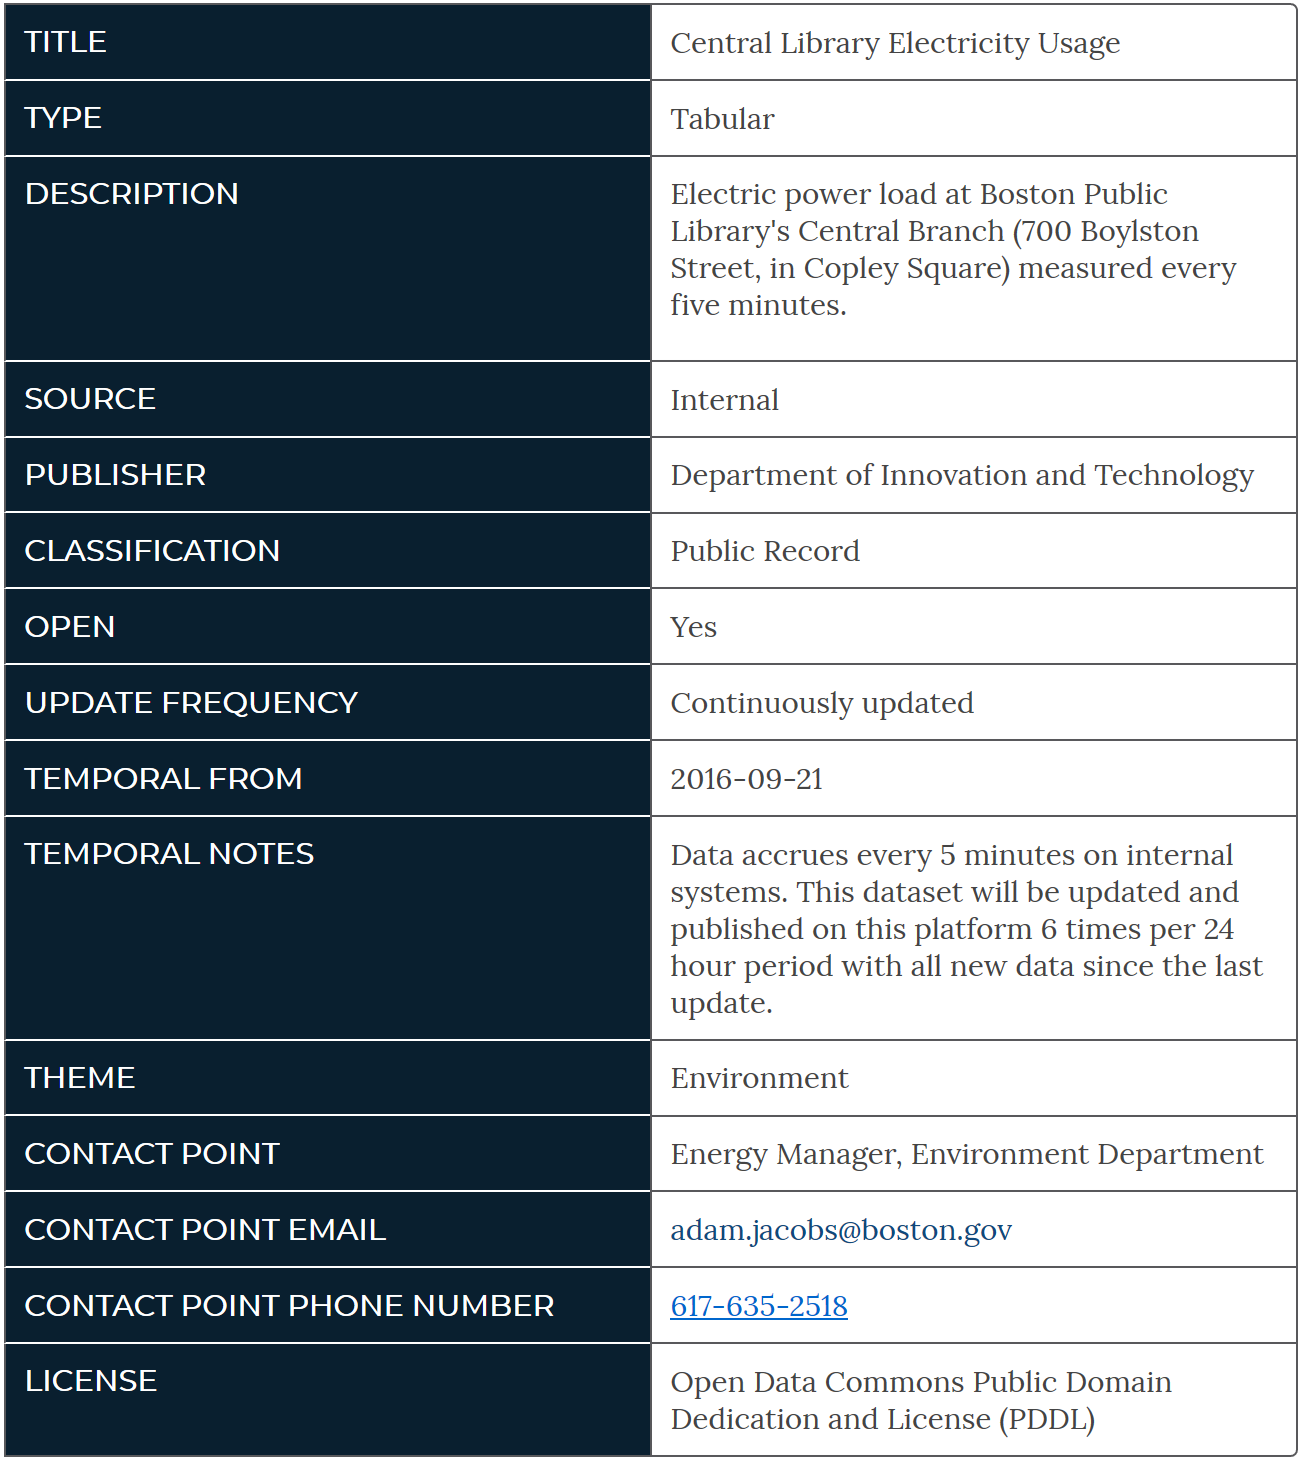

In [301]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.plotly as py
init_notebook_mode(connected=True)
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


In [302]:
df=pd.read_csv('/Users/600035004/Downloads/copley_library_electric_use.csv')
df.DateTime_Measured=pd.to_datetime(df.DateTime_Measured,format='%Y-%m-%d %H:%M:%S')
df.head()

DateTime_Measured  Total_Demand_KW
0 2018-09-26 08:25:00           1548.0
1 2018-09-26 08:20:00           1540.0
2 2018-09-26 08:15:00           1555.0
3 2018-09-26 08:10:00           1512.0
4 2018-09-26 08:05:00           1519.0

In [303]:
print('Total Number of Readings-', df.shape[0])

Total Number of Readings- 211645


In [304]:
df['Date']=df.DateTime_Measured.dt.date
df['time']=df.DateTime_Measured.dt.time

In [305]:
df_resample=df.copy()
df_resample=df_resample.set_index(df_resample.DateTime_Measured)
df_resample['Total_Demand_KW']=df_resample['Total_Demand_KW'].resample('30T').mean()
df_resample=df_resample.dropna()
df_resample.head()

DateTime_Measured  Total_Demand_KW        Date      time
DateTime_Measured                                                             
2018-09-26 08:00:00 2018-09-26 08:00:00      1532.166667  2018-09-26  08:00:00
2018-09-26 07:30:00 2018-09-26 07:30:00      1473.333333  2018-09-26  07:30:00
2018-09-26 07:00:00 2018-09-26 07:00:00      1437.333333  2018-09-26  07:00:00
2018-09-26 06:30:00 2018-09-26 06:30:00      1437.166667  2018-09-26  06:30:00
2018-09-26 06:00:00 2018-09-26 06:00:00      1370.833333  2018-09-26  06:00:00

In [306]:
trace0 = go.Scatter(x=df_resample.index,y=df_resample['Total_Demand_KW'])
data = [trace0]

layout = go.Layout(
    title='Power Consumption at Boston Public Library',
    xaxis=dict(
        title='Dates',
        titlefont=dict( size=18)),
    yaxis=dict(title='Power (KW)',
        titlefont=dict(size=18  ) )
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [307]:
sept=df[df.DateTime_Measured>'2018-09-01']
sept_resample=df_resample[df_resample.DateTime_Measured>'2018-09-01']
trace0 = go.Scatter(x=sept_resample.index,y=sept_resample['Total_Demand_KW'])
data = [trace0]

layout = go.Layout(
    title='Power Consumption for the month of September 2018',
    xaxis=dict(
        title='Dates',
        titlefont=dict( size=18)),
    yaxis=dict(title='Power (KW)',
        titlefont=dict(size=18  ) )
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [308]:
sept_resample=df_resample[df_resample.DateTime_Measured>'2018-08-31 23:30:00']
sept_resample=sept_resample[sept_resample.DateTime_Measured<'2018-09-02 00:30:00']
trace0 = go.Scatter(x=sept_resample.index,y=sept_resample['Total_Demand_KW'],name='2018_09_01 (Sat)')

sept_resample=df_resample[df_resample.DateTime_Measured>'2018-09-02']
sept_resample=sept_resample[sept_resample.DateTime_Measured<'2018-09-03']
trace1 = go.Scatter(x=sept_resample.index,y=sept_resample['Total_Demand_KW'],name='2018_09_02 (Sun)')

sept_resample=df_resample[df_resample.DateTime_Measured>'2018-09-03']
sept_resample=sept_resample[sept_resample.DateTime_Measured<'2018-09-04']
trace2 = go.Scatter(x=sept_resample.index,y=sept_resample['Total_Demand_KW'],name='2018_09_03 (Mon)')

sept_resample=df_resample[df_resample.DateTime_Measured>'2018-09-04']
sept_resample=sept_resample[sept_resample.DateTime_Measured<'2018-09-05']
trace3 = go.Scatter(x=sept_resample.index,y=sept_resample['Total_Demand_KW'],name='2018_09_04 (Tue)')

sept_resample=df_resample[df_resample.DateTime_Measured>'2018-09-05']
sept_resample=sept_resample[sept_resample.DateTime_Measured<'2018-09-06']
trace4 = go.Scatter(x=sept_resample.index,y=sept_resample['Total_Demand_KW'],name='2018_09_05 (Wed)')

sept_resample=df_resample[df_resample.DateTime_Measured>'2018-09-06']
sept_resample=sept_resample[sept_resample.DateTime_Measured<'2018-09-07']
trace5 = go.Scatter(x=sept_resample.index,y=sept_resample['Total_Demand_KW'],name='2018_09_06 (Thu)')

sept_resample=df_resample[df_resample.DateTime_Measured>'2018-09-07']
sept_resample=sept_resample[sept_resample.DateTime_Measured<'2018-09-08']
trace6 = go.Scatter(x=sept_resample.index,y=sept_resample['Total_Demand_KW'],name='2018_09_07 (Fri)')

sept_resample=df_resample[df_resample.DateTime_Measured>'2018-09-08']
sept_resample=sept_resample[sept_resample.DateTime_Measured<'2018-09-09 00:30:00']
trace7 = go.Scatter(x=sept_resample.index,y=sept_resample['Total_Demand_KW'],name='2018_09_08 (Sat)')

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7]

layout = go.Layout(
    title='Power Consumption for the 1st week of September',
    xaxis=dict(
        title='Dates',
        titlefont=dict( size=18)),
    yaxis=dict(title='Power (KW)',
        titlefont=dict(size=18  ) )
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

The library reduces its power consumption from 10pm everyday and it increases the next day at 2:30 again. There is a cylic increase and decrease of power consumption through out the day. The power consumption steadily increases over the week, with Wed and Thu having the highest consumption(KW).

In [309]:
sept_resample=df_resample[df_resample.DateTime_Measured>'2018-09-02 23:00:00']
sept_resample=sept_resample[sept_resample.DateTime_Measured<'2018-09-04 00:01:00']
trace2 = go.Scatter(x=sept_resample.index,y=sept_resample['Total_Demand_KW'],name='2018_09_03 (Mon)')
data = [trace2]

layout = go.Layout(
    title='Power Consumption for September 3 (Monday)',
    xaxis=dict(
        title='Time',
        titlefont=dict( size=18)),
    yaxis=dict(title='Power (KW)',
        titlefont=dict(size=18  ) )
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)


We can see that through out the day, the power consumption increases gradually with highest power consumption at 4:30pm.

## Time Series Analysis

In [310]:
df=pd.read_csv('/Users/600035004/Downloads/copley_library_electric_use.csv')
df.DateTime_Measured=pd.to_datetime(df.DateTime_Measured,format='%Y-%m-%d %H:%M:%S')
df=df.set_index(df.DateTime_Measured)
df=df.resample('1D').mean()
df.head()

Total_Demand_KW
DateTime_Measured                 
2016-09-21             1525.445783
2016-09-22             1386.600000
2016-09-23             1279.100000
2016-09-24             1231.125000
2016-09-25             1261.847500

In [311]:
type(df)

pandas.core.frame.DataFrame

In [312]:
df.dtypes

Total_Demand_KW    float64
dtype: object

In [313]:
df.describe()

Total_Demand_KW
count       736.000000
mean       1120.871022
std         165.360301
min         526.138889
25%        1024.010417
50%        1103.699375
75%        1244.365000
max        1525.445783

In [314]:
df.index

DatetimeIndex(['2016-09-21', '2016-09-22', '2016-09-23', '2016-09-24',
               '2016-09-25', '2016-09-26', '2016-09-27', '2016-09-28',
               '2016-09-29', '2016-09-30',
               ...
               '2018-09-17', '2018-09-18', '2018-09-19', '2018-09-20',
               '2018-09-21', '2018-09-22', '2018-09-23', '2018-09-24',
               '2018-09-25', '2018-09-26'],
              dtype='datetime64[ns]', name='DateTime_Measured', length=736, freq='D')

In [315]:
y = df["Total_Demand_KW"]
y.head()

DateTime_Measured
2016-09-21    1525.445783
2016-09-22    1386.600000
2016-09-23    1279.100000
2016-09-24    1231.125000
2016-09-25    1261.847500
Freq: D, Name: Total_Demand_KW, dtype: float64

In [316]:
y['2018-09-01']

1319.4375

## Trend

From the preliminary plots so far it is obvious that there is some kind of trend in the series.

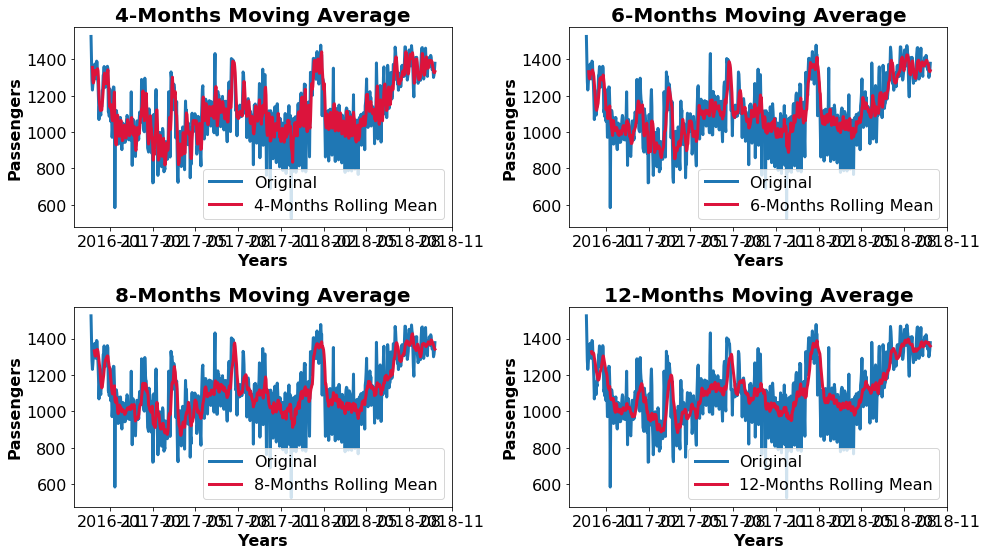

In [317]:
# define figure and axes
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False);
fig.set_figwidth(14);
fig.set_figheight(8);

# push data to each ax
#upper left
axes[0][0].plot(y.index, y, label='Original');
axes[0][0].plot(y.index, y.rolling(window=4).mean(), label='4-Months Rolling Mean', color='crimson');
axes[0][0].set_xlabel("Years");
axes[0][0].set_ylabel("Passengers");
axes[0][0].set_title("4-Months Moving Average");
axes[0][0].legend(loc='best');

# upper right
axes[0][1].plot(y.index, y, label='Original')
axes[0][1].plot(y.index, y.rolling(window=6).mean(), label='6-Months Rolling Mean', color='crimson');
axes[0][1].set_xlabel("Years");
axes[0][1].set_ylabel("Passengers");
axes[0][1].set_title("6-Months Moving Average");
axes[0][1].legend(loc='best');

# lower left
axes[1][0].plot(y.index, y, label='Original');
axes[1][0].plot(y.index, y.rolling(window=8).mean(), label='8-Months Rolling Mean', color='crimson');
axes[1][0].set_xlabel("Years");
axes[1][0].set_ylabel("Passengers");
axes[1][0].set_title("8-Months Moving Average");
axes[1][0].legend(loc='best');

# lower right
axes[1][1].plot(y.index, y, label='Original');
axes[1][1].plot(y.index, y.rolling(window=12).mean(), label='12-Months Rolling Mean', color='crimson');
axes[1][1].set_xlabel("Years");
axes[1][1].set_ylabel("Passengers");
axes[1][1].set_title("12-Months Moving Average");
axes[1][1].legend(loc='best');
plt.tight_layout();
#plt.savefig('./img/rolling_windows.png')
plt.show()

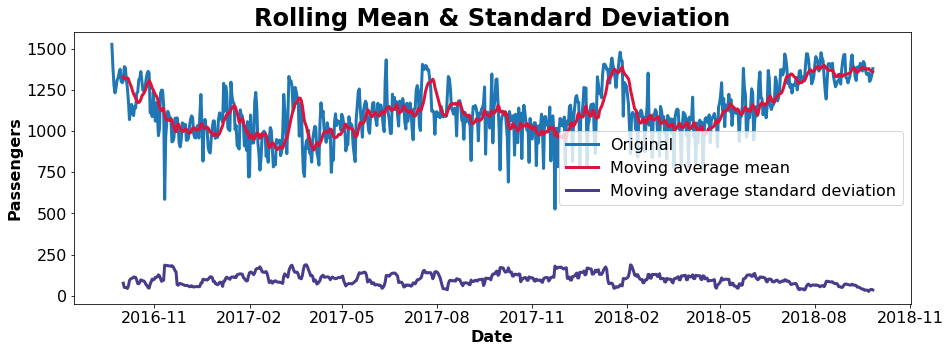

In [318]:
def plot_rolling_average(y, window=12):
    '''
    Plot rolling mean and rolling standard deviation for a given time series and window
    '''
    # calculate moving averages
    rolling_mean = y.rolling(12).mean()
    rolling_std = y.rolling(12).std()

    # plot statistics
    plt.figure(figsize=(15,5))
    plt.plot(y, label='Original')
    plt.plot(rolling_mean, color='crimson', label='Moving average mean')
    plt.plot(rolling_std, color='darkslateblue', label='Moving average standard deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation', fontsize=24)
    plt.xlabel('Date')
    plt.ylabel('Passengers')
    #plt.savefig('./img/12m_moving_average.png')
    plt.show(block=False)
    return
plot_rolling_average(y)

In [319]:
df['Month'] = df.index.strftime('%b')
df['Year'] = df.index.year
# reshape data using 'Year' as index and 'Month' as column
df.head()

Total_Demand_KW Month  Year
DateTime_Measured                             
2016-09-21             1525.445783   Sep  2016
2016-09-22             1386.600000   Sep  2016
2016-09-23             1279.100000   Sep  2016
2016-09-24             1231.125000   Sep  2016
2016-09-25             1261.847500   Sep  2016

## Dickey Fuller Test

In [320]:
from statsmodels.tsa.stattools import adfuller, kpss

In [321]:
def adf_test(y):
    # perform Augmented Dickey Fuller test
    print('Results of Augmented Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)

In [322]:
def kpss_test(y):
    # perform Augmented Dickey Fuller test
    print('Results of KPSS test:')
    dftest = kpss(y)
    dfoutput = pd.Series(dftest[0:3], index=['test statistic', 'p-value', '# of lags'])
    for key, value in dftest[3].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)

In [323]:
adf_test(y)

Results of Augmented Dickey-Fuller test:
test statistic           -1.826042
p-value                   0.367611
# of lags                20.000000
# of observations       715.000000
Critical Value (1%)      -3.439529
Critical Value (5%)      -2.865591
Critical Value (10%)     -2.568927
dtype: float64


In [324]:
kpss_test(y)

Results of KPSS test:
test statistic            0.990381
p-value                   0.010000
# of lags                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning:

p-value is smaller than the indicated p-value



In [325]:
def ts_diagnostics(y, lags=None,title='Boston Public Library'):
    '''
    Calculate acf, pacf, qq plot and Augmented Dickey Fuller test for a given time series
    '''
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    # weekly moving averages (5 day window because of workdays)
    rolling_mean = y.rolling(12).mean()
    rolling_std = y.rolling(12).mean()
    
    fig = plt.figure(figsize=(14, 12))
    layout = (3, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    qq_ax = plt.subplot2grid(layout, (2, 0))
    hist_ax = plt.subplot2grid(layout, (2, 1))
    
    # time series plot
    y.plot(ax=ts_ax)
    rolling_mean.plot(ax=ts_ax, color='crimson');
    rolling_std.plot(ax=ts_ax, color='darkslateblue');
    plt.legend(loc='best')
    ts_ax.set_title(title, fontsize=24);
    
    # acf and pacf
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5) 
    
    # qq plot
    sm.qqplot(y, line='s', ax=qq_ax)
    qq_ax.set_title('QQ Plot')
    
    # hist plot
    y.plot(ax=hist_ax, kind='hist', bins=25);
    hist_ax.set_title('Histogram');
    plt.tight_layout();
    #plt.savefig('./img/{}.png'.format(filename))
    plt.show()
    
    # perform Augmented Dickey Fuller test
    print('Results of Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    return

No handles with labels found to put in legend.


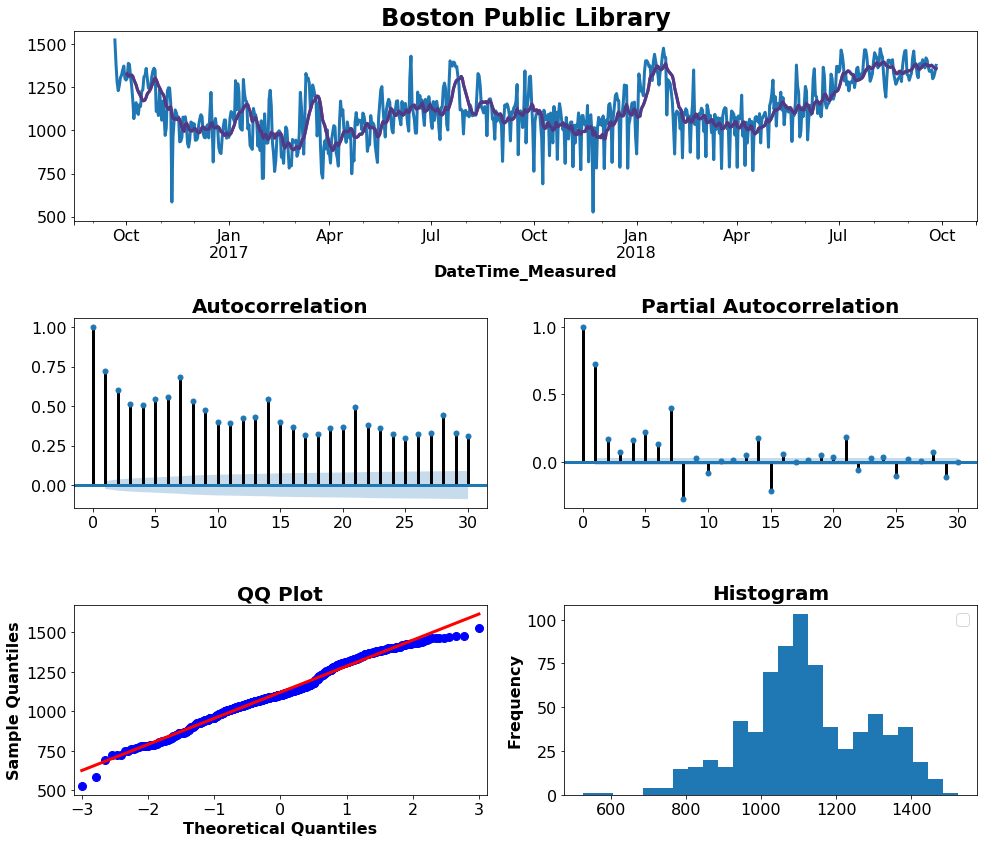

Results of Dickey-Fuller test:
test statistic           -1.826042
p-value                   0.367611
# of lags                20.000000
# of observations       715.000000
Critical Value (1%)      -3.439529
Critical Value (5%)      -2.865591
Critical Value (10%)     -2.568927
dtype: float64


In [326]:
ts_diagnostics(y, lags=30)

## Trend stationary

The first difference is used to make a time series trend or mean stationary. A first difference can be applied applied by

In [327]:
from scipy import signal
y_detrend = signal.detrend(y)

In [328]:
y_diff = np.diff(y)

No handles with labels found to put in legend.


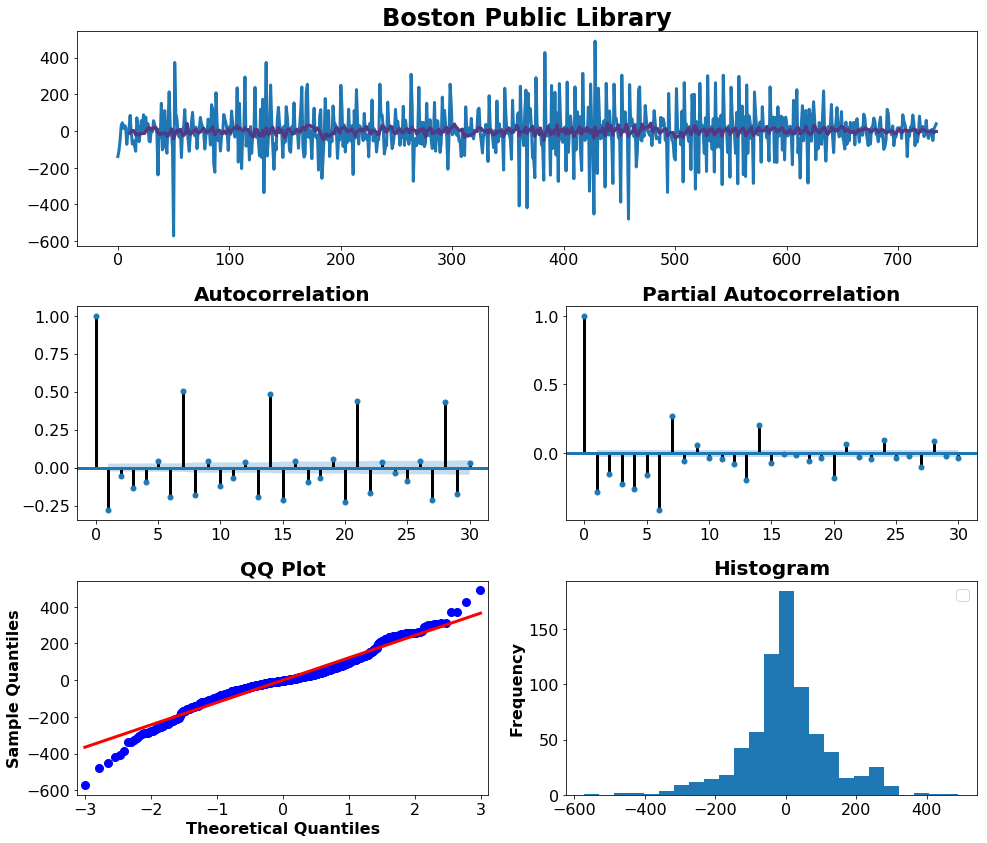

Results of Dickey-Fuller test:
test statistic         -9.707649e+00
p-value                 1.031588e-16
# of lags               1.900000e+01
# of observations       7.150000e+02
Critical Value (1%)    -3.439529e+00
Critical Value (5%)    -2.865591e+00
Critical Value (10%)   -2.568927e+00
dtype: float64


In [329]:
ts_diagnostics(y_diff, lags=30)

In [330]:
import warnings
import itertools
# define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

In [331]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
tmp_model = None
best_mdl = None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df[:'2018-08-31'].Total_Demand_KW,
                                            order=param,
                                            seasonal_order=param_seasonal
                                            )

            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_mdl = tmp_mdl
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:8993.576062983262
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:9771.195680330824
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:9410.073614492674
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:9203.499094021514
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:9204.014287390604
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:9068.74567952826
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:8993.392577925159
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:8993.018866703442
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:9436.764838605253
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:8979.553464226216
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:9277.243822213459
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:9203.84419045323
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:9005.934832145695
ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:8987.809296062835
ARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:8995.01596198967
ARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC:9212.990443701357
ARIMA(0, 0, 0)x(2, 2, 1, 12)12 - AIC:8923.628513304397
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:11102.373370373158
ARIMA(0, 0, 

C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:10697.748658366458
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:8847.714936083652
ARIMA(0, 0, 1)x(2, 1, 1, 12)12 - AIC:8762.75013978369
ARIMA(0, 0, 1)x(2, 1, 2, 12)12 - AIC:8766.388181744549
ARIMA(0, 0, 1)x(2, 2, 0, 12)12 - AIC:9053.271765658525
ARIMA(0, 0, 1)x(2, 2, 1, 12)12 - AIC:8767.39918003859


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:10511.27842157978
ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:10530.029165290885


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:9892.593917056549
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:8983.886959349999
ARIMA(0, 0, 2)x(0, 1, 1, 12)12 - AIC:8705.335551476413
ARIMA(0, 0, 2)x(0, 1, 2, 12)12 - AIC:8706.094399578373
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:9546.783699966938
ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:9504.630922902055


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:9889.576956501276


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:11179.952698971068
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:8831.817503315957
ARIMA(0, 0, 2)x(1, 1, 1, 12)12 - AIC:8700.413557857628
ARIMA(0, 0, 2)x(1, 1, 2, 12)12 - AIC:8706.424236101013
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:9180.643039138013
ARIMA(0, 0, 2)x(1, 2, 1, 12)12 - AIC:8749.17263844427


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:9452.517281785542


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:10911.722976259643
ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:8790.067771399608
ARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:8691.857571213683


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:8693.757288791592
ARIMA(0, 0, 2)x(2, 2, 0, 12)12 - AIC:9015.943167085672
ARIMA(0, 0, 2)x(2, 2, 1, 12)12 - AIC:8713.448596056756
ARIMA(0, 0, 2)x(2, 2, 2, 12)12 - AIC:8746.253906431306
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:8847.458309340587
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:8848.53001086419
ARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:8849.785445925656
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:9165.014916946953
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:8748.996983911198
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:8750.000660661775
ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:9752.872848512628
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:8848.585137659189
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:8847.137749375845
ARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:8842.591661322338
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:9000.452687207462
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:8750.066899454838
ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:8748.643674336945
ARIMA(0, 1, 0)x(1, 2, 0, 12)12 - AIC:9363.129872772684
ARIMA(0, 1,

C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:9320.065251574
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:9598.512756679074
ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:9383.254462621688
ARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:9385.433094232707
ARIMA(0, 2, 0)x(2, 2, 0, 12)12 - AIC:9782.880793986416
ARIMA(0, 2, 0)x(2, 2, 1, 12)12 - AIC:9503.694991158187
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:8844.165237898043
ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:8845.107568377774
ARIMA(0, 2, 1)x(0, 0, 2, 12)12 - AIC:8846.460193981
ARIMA(0, 2, 1)x(0, 1, 0, 12)12 - AIC:9161.074193243721
ARIMA(0, 2, 1)x(0, 1, 1, 12)12 - AIC:8751.12873597601
ARIMA(0, 2, 1)x(0, 1, 2, 12)12 - AIC:8752.066447471208
ARIMA(0, 2, 1)x(0, 2, 0, 12)12 - AIC:9747.725221860012
ARIMA(0, 2, 1)x(1, 0, 0, 12)12 - AIC:8845.167166111052
ARIMA(0, 2, 1)x(1, 0, 1, 12)12 - AIC:8843.75243614121
ARIMA(0, 2, 1)x(1, 0, 2, 12)12 - AIC:8839.698993701393
ARIMA(0, 2, 1)x(1, 1, 0, 12)12 - AIC:8997.35023512942
ARIMA(0, 2, 1)x(1, 1, 1, 12)12 - AIC:8752.117993174894
ARIMA(0, 2, 1)x(1, 

C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:8869.289845812418
ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:8783.173518590937
ARIMA(1, 0, 0)x(2, 1, 1, 12)12 - AIC:8649.293436615138
ARIMA(1, 0, 0)x(2, 1, 2, 12)12 - AIC:8650.269854419987
ARIMA(1, 0, 0)x(2, 2, 0, 12)12 - AIC:9018.813486502362
ARIMA(1, 0, 0)x(2, 2, 1, 12)12 - AIC:8706.580235352356
ARIMA(1, 0, 0)x(2, 2, 2, 12)12 - AIC:8964.49016249913
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:8748.361393247058
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:8746.876804945061
ARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:8743.628043093784
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:8980.642428834908
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:8630.752411250109
ARIMA(1, 0, 1)x(0, 1, 2, 12)12 - AIC:8632.74857991877
ARIMA(1, 0, 1)x(0, 2, 0, 12)12 - AIC:9546.11298342728
ARIMA(1, 0, 1)x(0, 2, 2, 12)12 - AIC:8601.712783904024
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:8747.502314934418
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:8752.338412642628
ARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:8751.126951168462
ARIMA(1, 0, 1

C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(1, 1, 2, 12)12 - AIC:8631.698855225924
ARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:9183.431415049763
ARIMA(1, 0, 1)x(1, 2, 1, 12)12 - AIC:8751.15361614731
ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:8743.02836005669
ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:8751.308473013698
ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:8775.388596573734
ARIMA(1, 0, 1)x(2, 1, 1, 12)12 - AIC:8637.643543088021


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(2, 1, 2, 12)12 - AIC:8633.85141597724
ARIMA(1, 0, 1)x(2, 2, 0, 12)12 - AIC:9020.022577237636
ARIMA(1, 0, 1)x(2, 2, 1, 12)12 - AIC:8700.824512457548
ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:8605.434314570955
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:8697.328616147879
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:8699.3034197321
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:8697.323364413245
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:8980.072327546304
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:8588.551183970998
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:8593.88096837147
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:9545.545312037098


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:8699.306579296459
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:8701.318049817535
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:8703.346937036826
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:8831.703082570391
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:8593.872034162905
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:8595.91260165158
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:9182.352271663396
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:8753.280911653488


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:8698.34178076564
ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:8703.257337931158
ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:8764.932598565527
ARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:8592.967825415886
ARIMA(1, 0, 2)x(2, 1, 2, 12)12 - AIC:8597.860928670612


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(2, 2, 0, 12)12 - AIC:9023.205171155154


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(2, 2, 1, 12)12 - AIC:8771.650409677824


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(2, 2, 2, 12)12 - AIC:8723.158306516852
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:8789.658708494428
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:8790.284172666674
ARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:8789.514778138899
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:9148.874749847608
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:8693.263373487829
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:8694.019646230841
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:9743.537536778005
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:8790.454992774508
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:8788.998027428945
ARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:8790.48324482577
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:8968.183107316572
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:8694.175838434512
ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:8697.019536502576
ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:9359.365049193266
ARIMA(1, 1, 0)x(1, 2, 1, 12)12 - AIC:8884.571205249062
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:8789.971143975252
ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:8790.476727378082
ARIMA(1, 1,

C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:8578.281646099587
ARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:9181.208471180471
ARIMA(1, 1, 2)x(1, 2, 1, 12)12 - AIC:8751.879358999362
ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:8672.721387572028
ARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:8669.479680674642
ARIMA(1, 1, 2)x(2, 0, 2, 12)12 - AIC:8669.823101619622
ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:8764.772548543662
ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:8578.181907763174


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:8580.026300502373
ARIMA(1, 1, 2)x(2, 2, 0, 12)12 - AIC:9017.013500808163
ARIMA(1, 1, 2)x(2, 2, 1, 12)12 - AIC:8727.80114793947
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:9204.052590697955
ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:9202.452702453522
ARIMA(1, 2, 0)x(0, 0, 2, 12)12 - AIC:9204.386226015711
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:9573.551597244194
ARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC:9100.101127105474
ARIMA(1, 2, 0)x(0, 1, 2, 12)12 - AIC:9098.55371269014
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:10175.05310953933
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:9202.36280107949
ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:9203.10462755622
ARIMA(1, 2, 0)x(1, 0, 2, 12)12 - AIC:9204.94170451359
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:9351.552033716813
ARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:9098.47032247579
ARIMA(1, 2, 0)x(1, 1, 2, 12)12 - AIC:9097.715349437614
ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:9732.10907047046
ARIMA(1, 2, 0)x(1, 2, 1, 12)12 - AIC:9260.50367839851
ARIMA(1, 2, 0)x(2,

C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:8696.788493254662
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:9162.854237276879
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:8801.177941355028
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:9691.975790517725
ARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:9320.54181479678
ARIMA(1, 2, 2)x(1, 2, 1, 12)12 - AIC:8921.270782489799
ARIMA(1, 2, 2)x(2, 2, 0, 12)12 - AIC:9198.609249190791


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 2, 1, 12)12 - AIC:8729.933206497726
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:8808.016814608562
ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:8808.758633123301
ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:8808.0978525077
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:8982.61091299201
ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:8638.61115606644
ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:8639.270900197736
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:9557.173120303283
ARIMA(2, 0, 0)x(0, 2, 2, 12)12 - AIC:8608.004263693943
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:8808.912402139085
ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:8811.9995215379
ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:8812.482986447954
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:8833.954737549051
ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:8639.258636318451
ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:8639.40835542677
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:9179.889275799844
ARIMA(2, 0, 0)x(1, 2, 1, 12)12 - AIC:8751.091345553104
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:8808.5278149523
ARIMA(2, 0, 0)x(2, 

C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:8689.749629155467
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:8939.19158652552
ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:8581.572934120386


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:8583.588957708838
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:9495.271333830402
ARIMA(2, 0, 1)x(0, 2, 2, 12)12 - AIC:8622.273090559334


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:8690.585504733628
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:8694.475523635998
ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:8698.06130421241
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:8804.05504599417
ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:8585.099545738773
ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:8583.744362337375
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:9146.410453373284
ARIMA(2, 0, 1)x(1, 2, 1, 12)12 - AIC:8725.657587534017


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:8705.595690929564


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:8695.395706207639
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:8760.2476229881
ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:8585.144950941187


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:8588.204722787978
ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:9022.708028591593


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 2, 1, 12)12 - AIC:8689.690514804282


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 2, 2, 12)12 - AIC:8617.642246120937
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:8980.866553127187


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:8599.429042250786


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:8623.522544731726
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:9495.126503500464


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(0, 2, 2, 12)12 - AIC:8606.946403109048
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:8833.371774549887


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:8600.765251438625
ARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:8601.075786843829
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:9144.120256772454
ARIMA(2, 0, 2)x(1, 2, 1, 12)12 - AIC:8755.11774882382


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:8779.35517642653


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:8599.479960975568


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:8599.729495996235


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 2, 0, 12)12 - AIC:8985.820726198679


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 2, 1, 12)12 - AIC:8705.51513390832
ARIMA(2, 0, 2)x(2, 2, 2, 12)12 - AIC:9012.463156393595
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:8775.298426514553
ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:8777.273766690536
ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:8772.763622465714
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:9093.34044983648
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:8678.949372141482
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:8680.944671610472
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:9649.010893454339
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:8777.278631009556
ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:8774.906227599155
ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:8772.710026529927
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:8955.495185944701
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:8680.945570730837
ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:8679.833369586151
ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:9326.536314380268
ARIMA(2, 1, 0)x(1, 2, 1, 12)12 - AIC:8871.583492566986
ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:8773.916615124748
ARIMA(2, 1, 

C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:8580.281400085532
ARIMA(2, 1, 1)x(2, 2, 0, 12)12 - AIC:9016.856668232544
ARIMA(2, 1, 1)x(2, 2, 1, 12)12 - AIC:8699.688952263645
ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:9489.449444057922
ARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:9143.945365454165
ARIMA(2, 1, 2)x(1, 2, 1, 12)12 - AIC:8754.148666360597
ARIMA(2, 1, 2)x(2, 2, 0, 12)12 - AIC:8980.52347866024


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(2, 2, 1, 12)12 - AIC:8686.044332646732
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:9115.282246607556
ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:9116.61536772802
ARIMA(2, 2, 0)x(0, 0, 2, 12)12 - AIC:9116.049270366675
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:9434.50653324868
ARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:9014.39358170568
ARIMA(2, 2, 0)x(0, 1, 2, 12)12 - AIC:9015.914869580125
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:9978.515811678282
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:9116.69993421192
ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:9114.600591552133
ARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:9115.634720334485
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:9284.711830031236
ARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:9015.974068012607
ARIMA(2, 2, 0)x(1, 1, 2, 12)12 - AIC:9018.227270457035
ARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:9652.568641299815
ARIMA(2, 2, 0)x(1, 2, 1, 12)12 - AIC:9194.083889376056
ARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:9116.63610143998
ARIMA(2, 2, 0)x(2, 0, 1, 12)12 - AIC:9115.538608133582
ARIMA(2, 2, 0)x

C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:8783.020373880066
ARIMA(2, 2, 1)x(1, 0, 2, 12)12 - AIC:8782.488520015013
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:8953.166357741542
ARIMA(2, 2, 1)x(1, 1, 1, 12)12 - AIC:8683.752011540986
ARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:8685.339933757652
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:9323.182480895577
ARIMA(2, 2, 1)x(1, 2, 1, 12)12 - AIC:8873.611644173867
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:8771.665713787264
ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:8859.545789096512
ARIMA(2, 2, 1)x(2, 1, 1, 12)12 - AIC:8680.630605932203


C:\Users\600035004\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(2, 1, 2, 12)12 - AIC:8684.383228030714
ARIMA(2, 2, 1)x(2, 2, 0, 12)12 - AIC:9145.82424187195
ARIMA(2, 2, 1)x(2, 2, 1, 12)12 - AIC:8788.897352245102
ARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:9654.906350826077
ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:9303.110232895515
ARIMA(2, 2, 2)x(1, 2, 1, 12)12 - AIC:8890.340462673314
ARIMA(2, 2, 2)x(2, 2, 0, 12)12 - AIC:9117.69655084459
ARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:8805.191930397357


In [332]:
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 0, 2)x(0, 2, 2, 12)12 model - AIC:8562.781219540813


In [333]:
mod = sm.tsa.statespace.SARIMAX(df[:'2018-08-31'].Total_Demand_KW, order=(1,0,2), seasonal_order=(0,2,2,12))
results = mod.fit()
print (results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                    Total_Demand_KW   No. Observations:                  710
Model:             SARIMAX(1, 0, 2)x(0, 2, 2, 12)   Log Likelihood               -4275.391
Date:                            Thu, 27 Sep 2018   AIC                           8562.781
Time:                                    15:49:11   BIC                           8589.966
Sample:                                09-21-2016   HQIC                          8573.300
                                     - 08-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.000   2222.880      0.000       0.999       1.001
ma.L1         -0.5387      0.035   

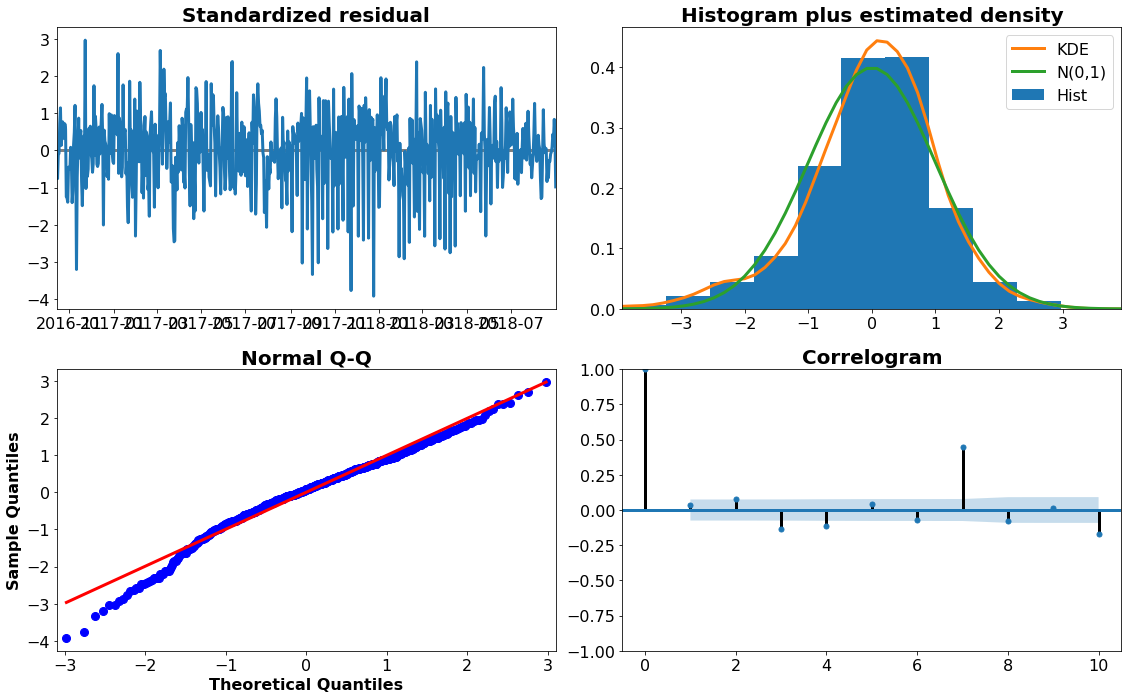

In [334]:
results.plot_diagnostics(figsize=(16, 10))
plt.tight_layout()
plt.show()

In [340]:
pred = results.get_prediction(start=pd.to_datetime('2018-09-01'), 
                              end=pd.to_datetime('2018-09-26'),
                              dynamic=True)
pred_ci = pred.conf_int()


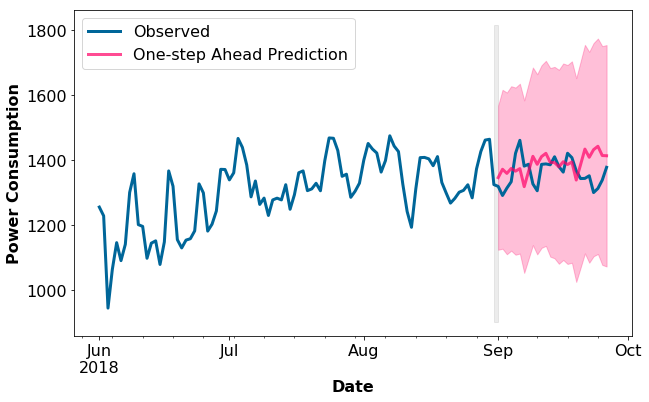

In [341]:
plt.figure(figsize=(10,6))
ax = df['2018-06-01':].Total_Demand_KW.plot(label='Observed',color='#006699');
pred.predicted_mean.plot(ax=ax, label='One-step Ahead Prediction', alpha=.7, color='#ff0066');
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);

# style the plot
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-09-01'), df[:'2018-08-31'].Total_Demand_KW.index[-1], alpha=.15, zorder=-1, color='grey');
ax.set_xlabel('Date');
ax.set_ylabel('Power Consumption');
plt.legend(loc='upper left');
#plt.savefig('./img/in_sample_pred.png')
plt.show()

In [342]:
y_hat = pred.predicted_mean
y_true = df['2018-09-01':].Total_Demand_KW
import math
# compute the mean square error
mse = ((y_hat - y_true) ** 2).mean()
print('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))

Prediction quality: 3828.67 MSE (61.88 RMSE)


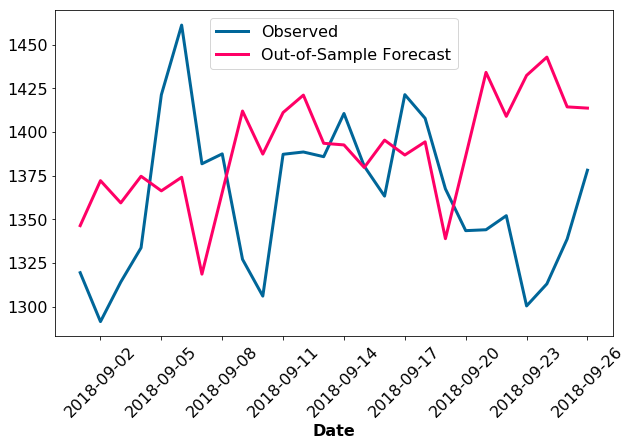

In [343]:
plt.figure(figsize=(10,6))
plt.plot(y_true, label='Observed', color='#006699')
plt.plot(y_hat, label='Out-of-Sample Forecast', color='#ff0066')

plt.xticks(rotation=45)
plt.xlabel('Date')
ax.set_ylabel('power')
plt.legend(loc='best');
#plt.savefig('./img/out_of_sample_comparison.png')
plt.show()

In [344]:
trace2 = go.Scatter(x=df['2018-09-01':].index,y=y_true,name='Observed')
trace3 = go.Scatter(y=y_hat,x=df['2018-09-01':].index, name ='Forecast')
data = [trace2,trace3]

layout = go.Layout(
    title='Power Consumption',
    xaxis=dict(
        title='Date',
        titlefont=dict( size=18)),
    yaxis=dict(title='Power (KW)',
        titlefont=dict(size=18  ) )
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)


## Deep Learning

In [345]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import plot_model 


# sklearn functionalities
from sklearn.preprocessing import MinMaxScaler

In [346]:
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['figure.figsize'] = (16, 8)
# recet to matplotlib standards
#jtplot.reset()

# matplotlib overrides
plt.rcParams['savefig.dpi'] = 120
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 3.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['text.usetex'] = False
#plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"


# jupyter wdgets
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image, IFrame

### A Supervised Learning Task


Time series prediction problems are inherently different from supervised learning problems in that obervastions posses a timely ordering and no observeable input. Thus, the time series prediction problem has to be converted into a regression problem.

A supervised learing problem requires data of the form (X,y) where X is the observeable output and  is a matrix of input data which is assumed to cause the observed output. Since the output variable y is continuous this problem is called a supervised regression problem.

In [347]:
train=df[:'2018-08-31'].Total_Demand_KW
test=df['2018-09-01':].Total_Demand_KW
train.head()

DateTime_Measured
2016-09-21    1525.445783
2016-09-22    1386.600000
2016-09-23    1279.100000
2016-09-24    1231.125000
2016-09-25    1261.847500
Freq: D, Name: Total_Demand_KW, dtype: float64

In [348]:
def prepare_data(data, lags=1):
    """
    Create lagged data from an input time series
    """
    X, y = [], []
    for row in range(len(data) - lags - 1):
        a = data[row:(row + lags)]
        X.append(a)
        y.append(data[row + lags])
    return np.array(X), np.array(y)

The prepare_data function will be used to transform the time series into a regression problem. The lags argument takes an integer which corresponds the the number of previous time steps to use as input variables to predict the next time period. The default value is one but will be changed in a next iteration.
With the default setting a data set will be created where X is the number of passengers at time t and y is the number of passengers at time t+1 .

In [349]:
lags = 1
X_train, y_train = prepare_data(train, lags=lags)
X_test, y_test = prepare_data(test, lags)
y_true = y_test 

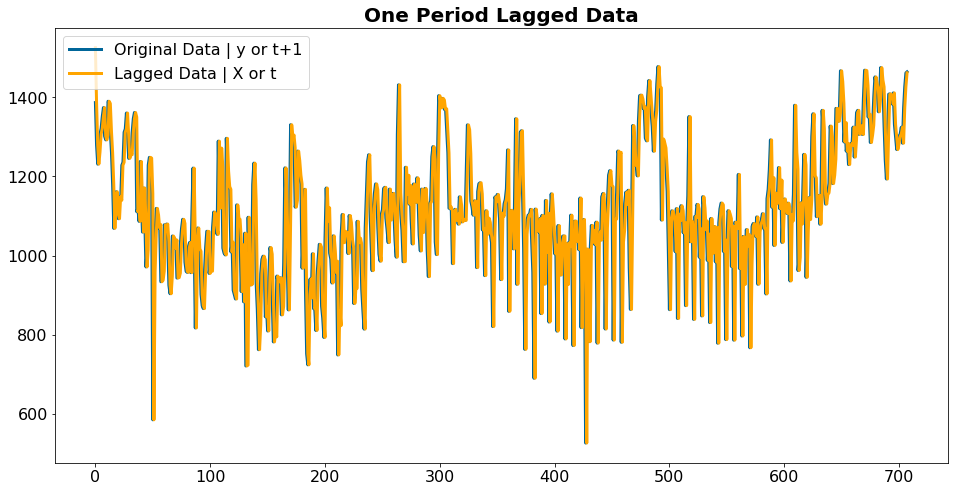

In [350]:
# plot the created data
plt.plot(y_train, label='Original Data | y or t+1', color='#006699')
plt.plot(X_train, label='Lagged Data | X or t', color='orange')
plt.legend(loc='upper left')
plt.title('One Period Lagged Data')
#plt.savefig('./img/ann_training.png')
plt.show()

In [351]:
mdl = Sequential()
mdl.add(Dense(8, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 9s - loss: 572205.6153
Epoch 2/200
 - 1s - loss: 17722.3899
Epoch 3/200
 - 2s - loss: 15371.3287
Epoch 4/200
 - 2s - loss: 15379.9370
Epoch 5/200
 - 1s - loss: 15409.8482
Epoch 6/200
 - 1s - loss: 15368.7643
Epoch 7/200
 - 1s - loss: 15475.2324
Epoch 8/200
 - 1s - loss: 15369.6859
Epoch 9/200
 - 1s - loss: 15519.9643
Epoch 10/200
 - 1s - loss: 15409.4338
Epoch 11/200
 - 1s - loss: 15451.0417
Epoch 12/200
 - 1s - loss: 15457.9598
Epoch 13/200
 - 1s - loss: 15404.8486
Epoch 14/200
 - 1s - loss: 15467.8859
Epoch 15/200
 - 1s - loss: 15500.5990
Epoch 16/200
 - 1s - loss: 15520.3689
Epoch 17/200
 - 1s - loss: 15491.1181
Epoch 18/200
 - 1s - loss: 15465.7481
Epoch 19/200
 - 1s - loss: 15582.3089
Epoch 20/200
 - 2s - loss: 15488.0198
Epoch 21/200
 - 1s - loss: 15495.3485
Epoch 22/200
 - 1s - loss: 15524.3264
Epoch 23/200
 - 1s - loss: 15431.4424
Epoch 24/200
 - 1s - loss: 15395.6004
Epoch 25/200
 - 2s - loss: 15525.8614
Epoch 26/200
 - 1s - loss: 15459.3696
Epoch 27/200
 - 1s -

In [352]:
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 15505.89 MSE (124.52 RMSE)
Test Score: 1805.25 MSE (42.49 RMSE)


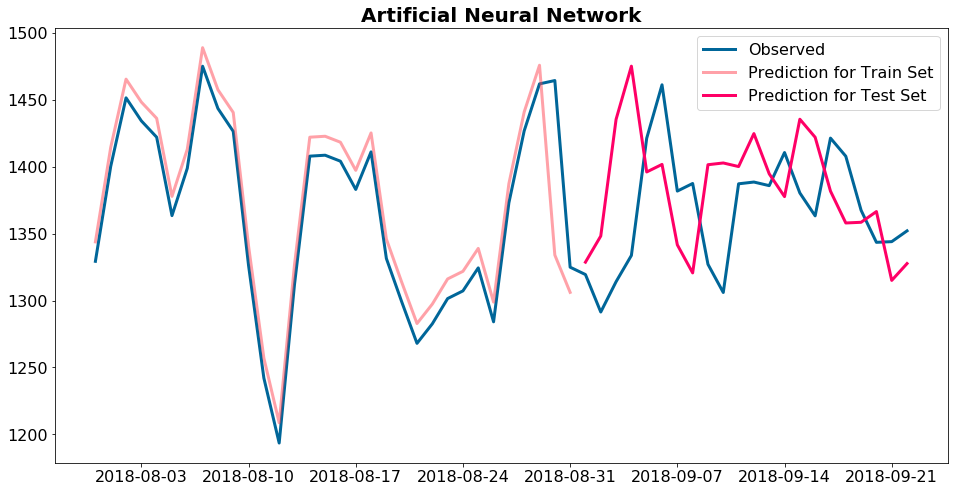

In [353]:
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)
train_predict =np.reshape(train_predict,708)
test_predict=np.reshape(test_predict,24)

# shift train predictions for plotting
train_predict_plot = np.empty_like(df.Total_Demand_KW)
train_predict_plot[:] = np.nan
train_predict_plot[lags: len(train_predict) + lags] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(df.Total_Demand_KW)
test_predict_plot[:] = np.nan
test_predict_plot[len(train_predict)+(lags*2)+1:len(df.Total_Demand_KW)-1] = test_predict


total=[]
for val in train_predict:
    total.append(val)
for val in test_predict:
    total.append(val)
df['pred']=np.nan
df['pred']=total+[0,0,0,0]


# plot baseline and predictions
plt.plot(df.Total_Demand_KW['2018-07-31':'2018-09-22'], label='Observed', color='#006699');
plt.plot(df['2018-07-31':'2018-08-31'].pred, label='Prediction for Train Set', color='#FF4552', alpha=0.5);
plt.plot(df['2018-09-01':'2018-09-22'].pred, label='Prediction for Test Set', color='#ff0066');
plt.legend(loc='best');
plt.title('Artificial Neural Network')
#plt.savefig('./img/ann_forecast.png')
plt.show()

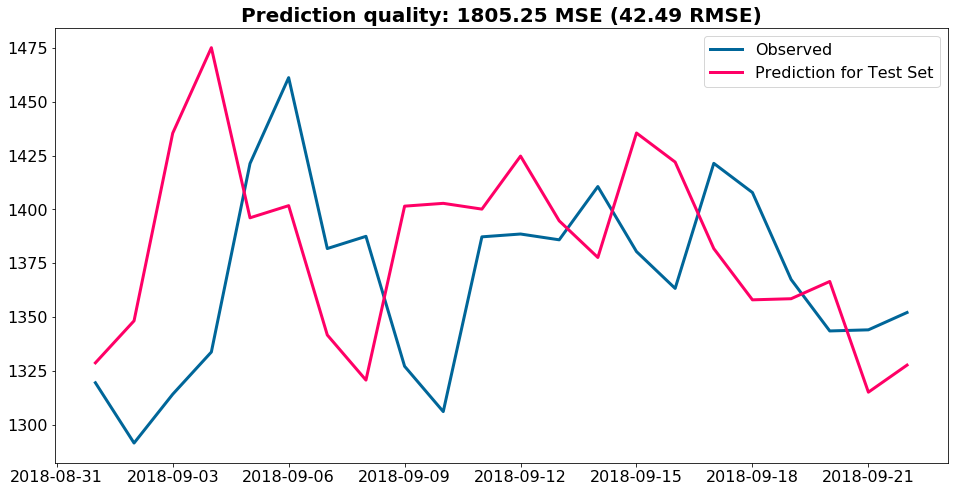

In [354]:
plt.plot(df.Total_Demand_KW['2018-09-01':'2018-09-22'], label='Observed', color='#006699');
plt.plot(df['2018-09-01':'2018-09-22'].pred, label='Prediction for Test Set', color='#ff0066');
plt.legend(loc='best');
plt.title('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))
#plt.savefig('./img/ann_forecast.png')
plt.show()


Since the neural network has only been fed by the last observation, it did not have much choice but to learn to apply t observation for the prediction of t+1.

## Multilayer perceptron with window


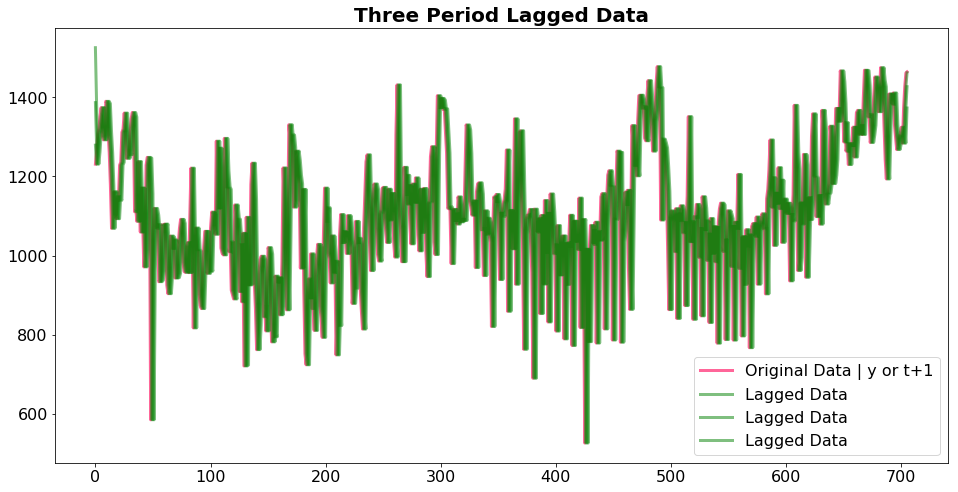

In [355]:
lags = 3
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)

# plot the created data
plt.plot(y_train, label='Original Data | y or t+1', color='#FF6699')
plt.plot(X_train, label='Lagged Data', color='green',alpha=0.5)
plt.legend(loc='best')
plt.title('Three Period Lagged Data')
#plt.savefig('./img/ann3_training.png')
plt.show()

In [356]:
mdl = Sequential()
mdl.add(Dense(8, input_dim=lags, activation='relu'))
mdl.add(Dense(4, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
 - 6s - loss: 352258.2906
Epoch 2/400
 - 1s - loss: 15807.3216
Epoch 3/400
 - 1s - loss: 15304.3300
Epoch 4/400
 - 1s - loss: 15244.9096
Epoch 5/400
 - 1s - loss: 15074.5982
Epoch 6/400
 - 2s - loss: 14923.8954
Epoch 7/400
 - 1s - loss: 14494.5034
Epoch 8/400
 - 1s - loss: 14183.9574
Epoch 9/400
 - 1s - loss: 14097.7242
Epoch 10/400
 - 1s - loss: 14488.6884
Epoch 11/400
 - 1s - loss: 14210.8713
Epoch 12/400
 - 1s - loss: 14100.3164
Epoch 13/400
 - 1s - loss: 13906.5932
Epoch 14/400
 - 1s - loss: 13993.1339
Epoch 15/400
 - 1s - loss: 14082.1837
Epoch 16/400
 - 1s - loss: 14097.0919
Epoch 17/400
 - 1s - loss: 14326.9114
Epoch 18/400
 - 1s - loss: 14170.8228
Epoch 19/400
 - 1s - loss: 14095.5080
Epoch 20/400
 - 1s - loss: 13900.4235
Epoch 21/400
 - 1s - loss: 14199.1858
Epoch 22/400
 - 1s - loss: 14036.7694
Epoch 23/400
 - 2s - loss: 13972.4032
Epoch 24/400
 - 2s - loss: 14023.7321
Epoch 25/400
 - 1s - loss: 14128.7244
Epoch 26/400
 - 1s - loss: 14255.5074
Epoch 27/400
 - 1s -

Epoch 214/400
 - 1s - loss: 12839.0325
Epoch 215/400
 - 1s - loss: 13002.9653
Epoch 216/400
 - 1s - loss: 13112.2031
Epoch 217/400
 - 1s - loss: 12997.5001
Epoch 218/400
 - 1s - loss: 12906.8740
Epoch 219/400
 - 1s - loss: 12637.3664
Epoch 220/400
 - 1s - loss: 12857.5058
Epoch 221/400
 - 1s - loss: 12629.3209
Epoch 222/400
 - 1s - loss: 13035.4100
Epoch 223/400
 - 1s - loss: 12685.6616
Epoch 224/400
 - 1s - loss: 12841.2283
Epoch 225/400
 - 1s - loss: 12884.7179
Epoch 226/400
 - 1s - loss: 12620.7711
Epoch 227/400
 - 1s - loss: 12587.1559
Epoch 228/400
 - 2s - loss: 12936.3176
Epoch 229/400
 - 1s - loss: 12741.6150
Epoch 230/400
 - 1s - loss: 12855.8249
Epoch 231/400
 - 1s - loss: 12946.8495
Epoch 232/400
 - 1s - loss: 12910.5353
Epoch 233/400
 - 1s - loss: 13024.1766
Epoch 234/400
 - 1s - loss: 12827.7372
Epoch 235/400
 - 1s - loss: 12874.6090
Epoch 236/400
 - 1s - loss: 12941.7397
Epoch 237/400
 - 1s - loss: 12742.0672
Epoch 238/400
 - 1s - loss: 12814.5733
Epoch 239/400
 - 1s - los

In [357]:
# Estimate model performance
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 12224.29 MSE (110.56 RMSE)
Test Score: 2294.58 MSE (47.90 RMSE)


In [358]:
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)
train_predict =np.reshape(train_predict,706)
test_predict=np.reshape(test_predict,22)

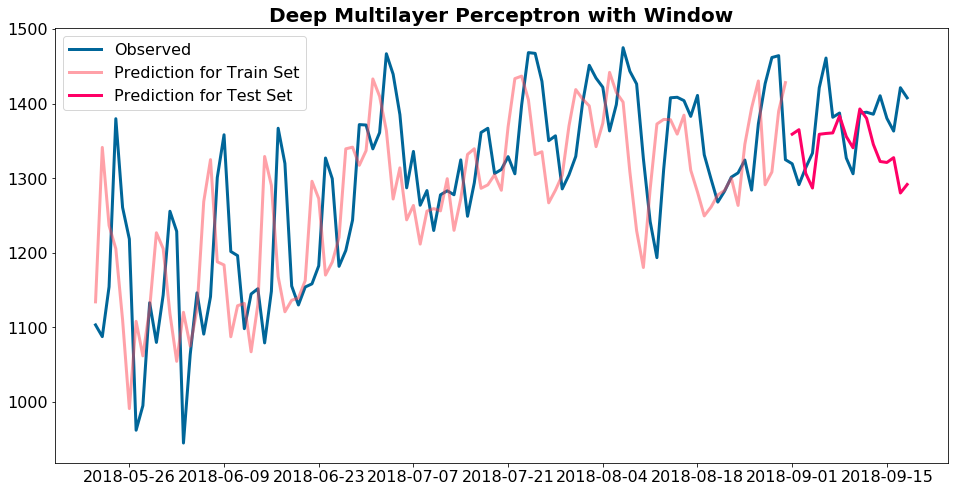

In [360]:
total=[]
for val in train_predict:
    total.append(val)
for val in test_predict:
    total.append(val)
df['pred']=np.nan
df['pred']=total+[0,0,0,0,0,0,0,0]
# plot baseline and predictions
plt.plot(df.Total_Demand_KW['2018-05-21':'2018-09-18'], label='Observed', color='#006699');
plt.plot(df['2018-05-21':'2018-08-31'].pred, label='Prediction for Train Set', color='#FF4552', alpha=0.5);
plt.plot(df['2018-09-01':'2018-09-18'].pred, label='Prediction for Test Set', color='#ff0066');
plt.legend(loc='best');
plt.title('Deep Multilayer Perceptron with Window')
#plt.savefig('./img/ann_forecast.png')
plt.show()

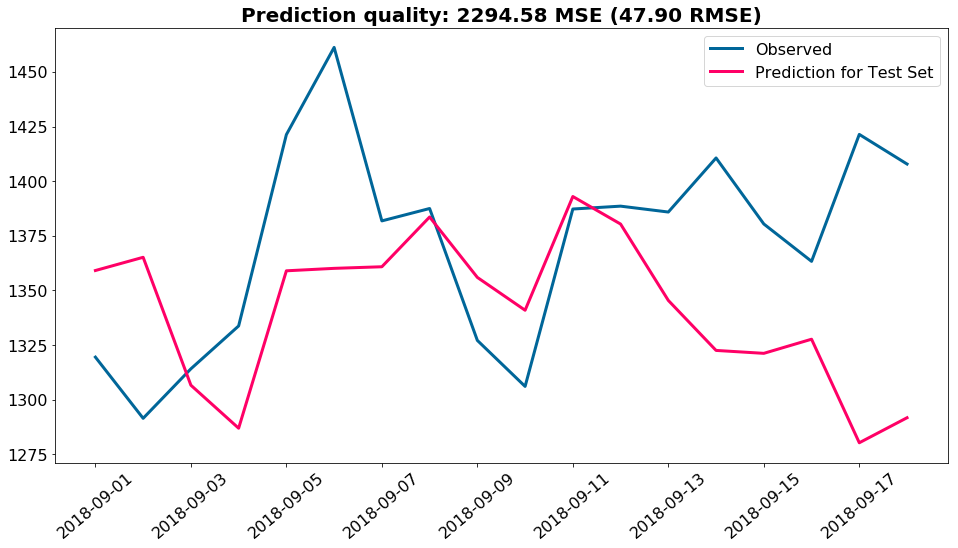

In [361]:
plt.plot(df.Total_Demand_KW['2018-09-01':'2018-09-18'], label='Observed', color='#006699');
plt.plot(df['2018-09-01':'2018-09-18'].pred, label='Prediction for Test Set', color='#ff0066');
plt.legend(loc='best');
plt.xticks(rotation=40)
plt.title('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))
#plt.savefig('./img/ann_forecast.png')
plt.show()

## LSTM

Long short-term memory (LSTM) is a recurrent neural network (RNN) architecture that remembers values over arbitrary intervals. Stored values are not modified as learning proceeds. RNNs allow forward and backward connections between neurons. An LSTM is well-suited to classify, process and predict time series given time lags of unknown size and duration between important events. - Wikipedia



### Architecture

LSTM blocks contain three or four "gates" that control information flow. These gates are implemented using the logistic function to compute a value between 0 and 1. Multiplication is applied with this value to partially allow or deny information to flow into or out of the memory. For example, an "input" gate controls the extent to which a new value flows into the memory. A "forget" gate controls the extent to which a value remains in memory. An "output" gate controls the extent to which the value in memory is used to compute the output activation of the block. (In some implementations, the input and forget gates are merged into a single gate. The motivation for combining them is that the time to forget is when a new value worth remembering becomes available.)

In [255]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

In [257]:
train=df[:'2018-08-31'].Total_Demand_KW
test=df['2018-09-01':].Total_Demand_KW
def prepare_data(data, lags=lags):
    """
    Create lagged data from an input time series
    """
    X, y = [], []
    for row in range(len(data) - lags - 1):
        a = data[row:(row + lags)]
        X.append(a)
        y.append(data[row + lags])
    return np.array(X), np.array(y)
lags = 3
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)


In [261]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [287]:
# create and fit the LSTM network
mdl = Sequential()
mdl.add(Dense(3, input_shape=(1, lags), activation='relu'))
mdl.add(LSTM(6, activation='relu'))
mdl.add(Dense(1, activation='relu'))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 4s - loss: 18075.9121
Epoch 2/100
 - 2s - loss: 15660.9336
Epoch 3/100
 - 2s - loss: 15133.9913
Epoch 4/100
 - 2s - loss: 14937.7805
Epoch 5/100
 - 2s - loss: 14863.6685
Epoch 6/100
 - 2s - loss: 14955.0622
Epoch 7/100
 - 2s - loss: 14827.0177
Epoch 8/100
 - 2s - loss: 14805.4975
Epoch 9/100
 - 2s - loss: 14633.0188
Epoch 10/100
 - 2s - loss: 14478.8862
Epoch 11/100
 - 2s - loss: 14491.9985
Epoch 12/100
 - 2s - loss: 14509.5489
Epoch 13/100
 - 2s - loss: 14459.4812
Epoch 14/100
 - 2s - loss: 14480.4573
Epoch 15/100
 - 2s - loss: 14418.6035
Epoch 16/100
 - 2s - loss: 14507.8361
Epoch 17/100
 - 2s - loss: 14328.4839
Epoch 18/100
 - 2s - loss: 14237.0738
Epoch 19/100
 - 2s - loss: 14348.0750
Epoch 20/100
 - 2s - loss: 14416.5414
Epoch 21/100
 - 2s - loss: 14367.4799
Epoch 22/100
 - 2s - loss: 14405.4418
Epoch 23/100
 - 2s - loss: 14288.8170
Epoch 24/100
 - 2s - loss: 14085.8467
Epoch 25/100
 - 2s - loss: 14360.0580
Epoch 26/100
 - 2s - loss: 14385.1146
Epoch 27/100
 - 2s - 

In [295]:
# make predictions
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

# invert transformation
#train_predict = scaler.inverse_transform(train_predict)
#y_train = scaler.inverse_transform([y_train])
#test_predict = scaler.inverse_transform(test_predict)
#y_test = scaler.inverse_transform([y_test])

# calculate root mean squared error

train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 12359.07 MSE (111.17 RMSE)
Test Score: 1908.96 MSE (43.69 RMSE)


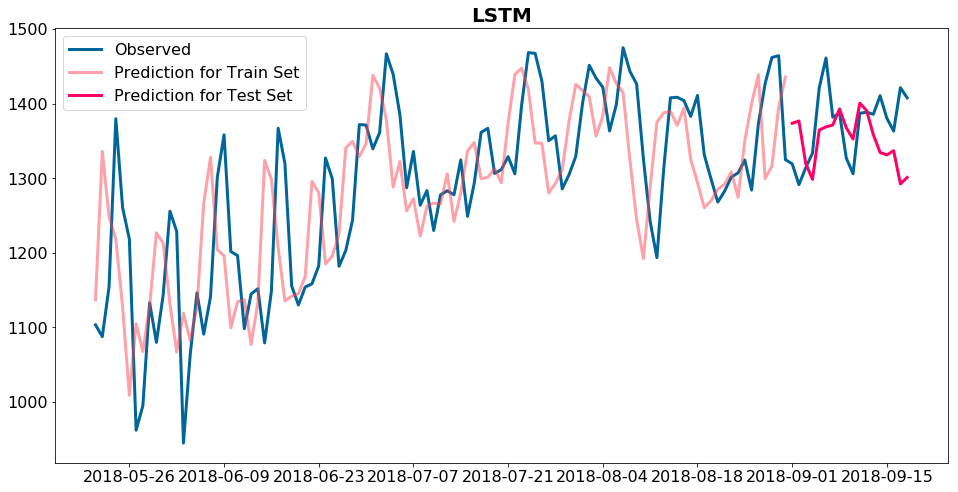

In [296]:
total=[]
for val in train_predict:
    total.append(val)
for val in test_predict:
    total.append(val)
df['lpred']=np.nan
df['lpred']=total+[0,0,0,0,0,0,0,0]
# plot baseline and predictions
plt.plot(df.Total_Demand_KW['2018-05-21':'2018-09-18'], label='Observed', color='#006699');
plt.plot(df['2018-05-21':'2018-08-31'].lpred, label='Prediction for Train Set', color='#FF4552', alpha=0.5);
plt.plot(df['2018-09-01':'2018-09-18'].lpred, label='Prediction for Test Set', color='#ff0066');
plt.legend(loc='best');
plt.title('LSTM')
#plt.savefig('./img/ann_forecast.png')
plt.show()

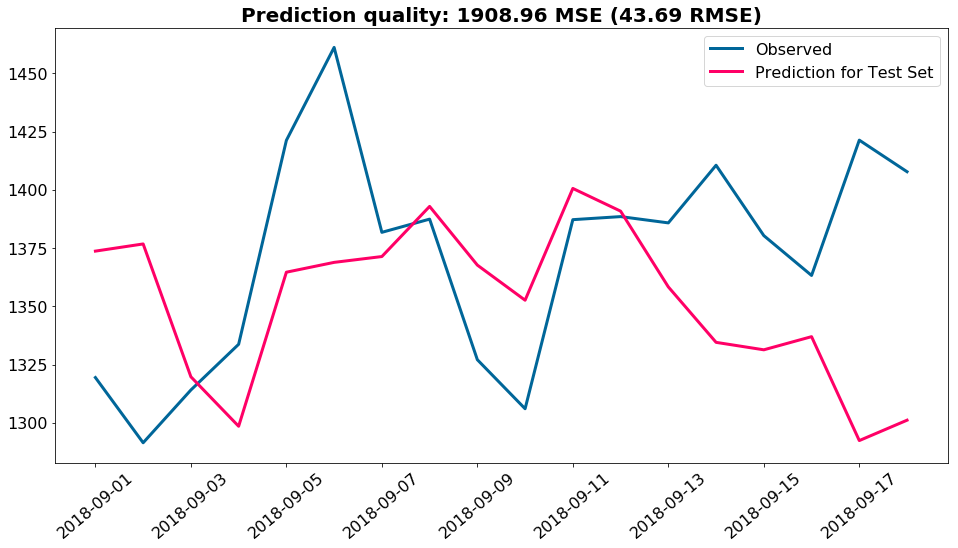

In [298]:
plt.plot(df.Total_Demand_KW['2018-09-01':'2018-09-18'], label='Observed', color='#006699');
plt.plot(df['2018-09-01':'2018-09-18'].lpred, label='Prediction for Test Set', color='#ff0066');
plt.legend(loc='best');
plt.xticks(rotation=40)
plt.title('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))
#plt.savefig('./img/ann_forecast.png')
plt.show()